!pip3 install plotly
!pip3 install nbformat
!pip install -q catboost 
!pip install -q lightgbm
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 

#plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

#modle
import time
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os


from sklearn import manifold
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, writers, FFMpegWriter

## TSNE

In [2]:
def pre(data):
    data['Label'] = data['Label'].apply(lambda x: int(x))
    Label=data.iloc[:,6]
    l=Label.tolist()
    labels = np.array(l)
    #print(my_array.shape)
    count = np.count_nonzero(labels == 1)
    print(count)
    return labels

In [3]:
def visual(feat):
    ts = manifold.TSNE(n_components=2, random_state=0)
    x_ts = ts.fit_transform(feat)
    print(x_ts.shape)  # [num, 2]
    x_min, x_max = x_ts.min(0), x_ts.max(0)
    x_final = (x_ts - x_min) / (x_max - x_min)
    return x_final

In [4]:
def plotlabels(X_tsne, True_labels, name):
    # design
    maker = ['o', 's']
    colors = ['#A8ED82','#E7B9C7']
    Label_Com = ['good','bad']
    
    #print(X_tsne)
    #print(True_labels)
    True_labels = True_labels.reshape((-1, 1))
    S_data = np.hstack((X_tsne, True_labels))  
    S_data = pd.DataFrame({'x': S_data[:, 0], 'y': S_data[:, 1],'label': S_data[:, 2]})
    #print(S_data)
    #print(S_data.shape)  # [num, 3]
    fig = plt.figure(figsize=(6,6))
    for index in range(2):  # 2 class
        X = S_data.loc[S_data['label'] == index]['x']
        Y = S_data.loc[S_data['label'] == index]['y']
        plt.scatter(X, Y, cmap='brg', s=100, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])

        plt.xticks([])  
        plt.yticks([])  

    plt.title(name, fontsize=10, fontweight='normal', pad=20)
    plt.legend() #
    plt.show(fig)
    plt.savefig('./image/'+name+'cluster.jpg')

In [15]:
def plotmp4(X_tsne, True_labels, name,num):
    True_labels = True_labels.reshape((-1, 1))
    S_data = np.hstack((X_tsne, True_labels))  
    S_data = pd.DataFrame({'x': S_data[:, 0], 'y': S_data[:, 1],'label': S_data[:, 2]})
    
    maker = ['o', 's']
    colors = ['#A8ED82','#E7B9C7']
    Label_Com = ['good','bad']
    
    def init():
        df_in = S_data.head(num)
        artists = []
        for index in range(2):  # 2 class
            X = df_in.loc[df_in['label'] == index]['x']
            Y = df_in.loc[df_in['label'] == index]['y']
            artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
            artists.append(artist)
        plt.xticks([])  
        plt.yticks([]) 
        #plt.legend()
        return artists

    
    def update(n):
        s_data=S_data.head(num+n)
        #print(s_data)
        artists = []
        for index in range(2):  # 2 class
            X = s_data.loc[s_data['label'] == index]['x']
            Y = s_data.loc[s_data['label'] == index]['y']
            artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
            artists.append(artist)
        plt.xticks([])  
        plt.yticks([]) 
        #plt.legend()
        return artists
    
    fig = plt.figure(figsize=(6,6))
    ani = FuncAnimation(fig=fig, func=update, init_func=init, blit=True, frames=range(0, 205, 5), interval=1000.0/12, save_count=100)
     
    #ani.save('./image/'+name+'test.gif', writer='imagemagick', fps=1)
    ani.save('./image/'+name+'test.gif', writer='pillow', fps=1)

#     print("start saving video")
#     #writer = animation.FFMpegWriter(fps=30)
#     writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#     ani.save('./image/'+name+'test.mp4', writer=writer)
#     print("video saved")
    plt.title(name, fontsize=10, fontweight='normal', pad=20)
    #
    plt.show()


150
(300, 2)


/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_4263/15383007.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_4263/15383007.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_4263/15383007.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])


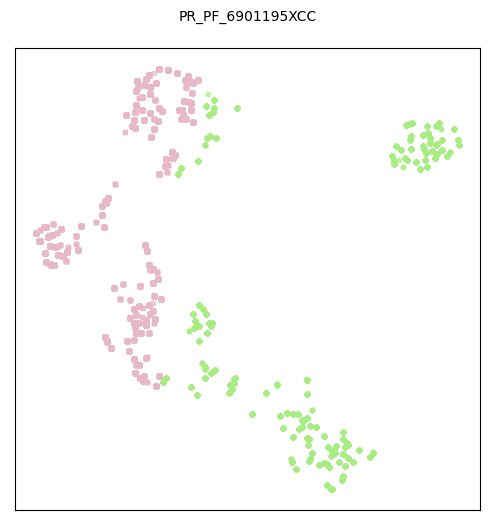

In [20]:
float_cd='PR_PF_6901195' # 6901195   3901684   4903220
model='XC' #XB CB Lg Knn 
# KL KX KC LX LC XC KLX LXC KLC KXC KLXC
strategy='C'# Un random C
num=100 # 100 1000
data_source="./query/"+strategy+"_"+model+"_"+float_cd+".csv"
data= pd.read_csv(data_source,index_col=0)
data_Value=data.iloc[:,:6]
labels=pre(data)

#plotlabels(visual(data_Value), my_array, float_cd+model+strategy)
plotmp4(visual(data_Value), labels, float_cd+model+strategy,num)